In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_input = pd.read_csv('train_data.csv')
test_input = pd.read_csv('test_data.csv')
train_output = pd.read_csv('train_label.csv')

In [4]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)

(1173760, 4)
(8960, 2)
(293440, 4)


In [5]:
train_input.head()

,ID,sensor_A,sensor_B,sensor_C
0,0.0,-0.781257,-0.368624,-0.668834
1,0.0,0.152001,-1.032890,0.013465
2,0.0,-1.815408,-0.501477,-1.103025
3,0.0,-0.402909,2.288443,-0.792889
4,0.0,-1.109159,2.819857,-0.544780


In [7]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173760 entries, 0 to 1173759
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   ID        1173760 non-null  float64
 1   sensor_A  1173760 non-null  float64
 2   sensor_B  1173760 non-null  float64
 3   sensor_C  1173760 non-null  float64
dtypes: float64(4)
memory usage: 35.8 MB


In [8]:
train_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8960 entries, 0 to 8959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      8960 non-null   int64
 1   type    8960 non-null   int64
dtypes: int64(2)
memory usage: 140.1 KB


In [9]:
data = train_input.drop('ID', axis=1)

In [10]:
target = train_output.drop('ID', axis=1)

In [11]:
data = data.join(target)

In [12]:
data.describe()

,sensor_A,sensor_B,sensor_C,type
count,1.173760e+06,1.173760e+06,1.173760e+06,8960.000000
mean,-3.277743e-04,-3.277743e-04,-3.277744e-04,2.494978
std,1.000572e+00,1.000597e+00,1.000605e+00,1.119083
min,-3.619561e+00,-5.896842e+00,-4.385735e+00,1.000000
25%,-8.175240e-01,-6.335718e-01,-7.034006e-01,1.000000
50%,-9.079777e-02,4.057315e-02,2.145573e-02,2.000000
75%,8.063138e-01,6.697789e-01,7.194825e-01,3.000000
max,3.680108e+00,4.599791e+00,4.074743e+00,4.000000


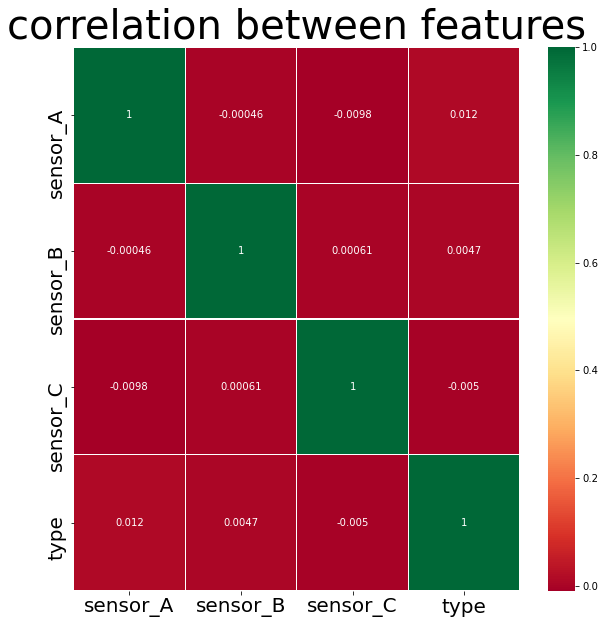

In [13]:
heatmap = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.title('correlation between features', fontsize=40)

plt.show()

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

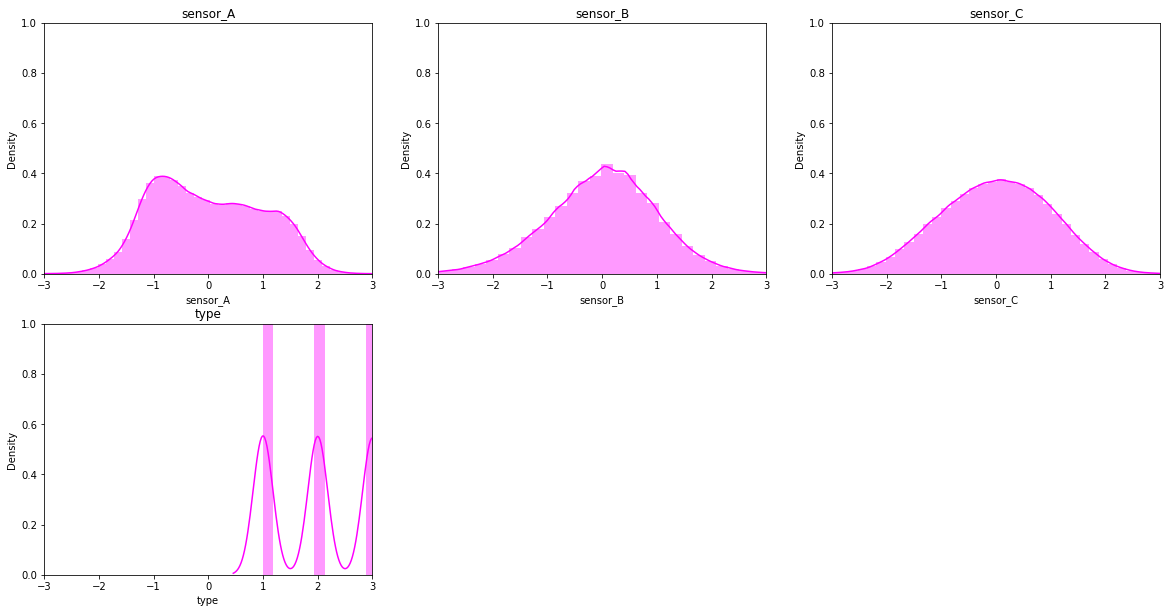

In [14]:
feature = data.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.xlim(-3,3)
    plt.ylim(0,1)
    sns.distplot(data[feature[i]],color='magenta')
plt.show()